<div align='center'>

# Linear Algebra Fundamentals - Part 1

### Part of Scientific-ML-Notes 

[![GitHub](https://img.shields.io/badge/GitHub-Repository-black?logo=github&scale=5)](https://github.com/mhnaderi/Scientific-ML-Notes)

---

In [7]:
# Import necessary libraries and set up the notebook environment
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

# Define a class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Linear Operators

Consider two complex vector spaces, $\mathbb{V}$ and $\mathbb{W}$. A mapping $A: \mathbb{V} \rightarrow \mathbb{W}$ is called a **linear operator** if it satisfies the property of linearity for all vectors $x, y \in \mathbb{V}$ and all scalars $\alpha, \beta \in \mathbb{C}$:

$$
A(\alpha x + \beta y) = \alpha A(x) + \beta A(y).
$$

This means that the operator $A$ preserves vector addition and scalar multiplication.

# Linear Operators as Matrices

Matrices can represent linear transformations by operating on vectors to produce new vectors. Consider a matrix $A \in \mathbb{R}^{m \times n}$ composed of column vectors $\mathbf{a}_1, \mathbf{a}_2, \dots, \mathbf{a}_n$, where each $\mathbf{a}_i$ is an $m$-dimensional vector:

$$
A = [\mathbf{a}_1 \ \mathbf{a}_2 \ \cdots \ \mathbf{a}_n].
$$

When we multiply $A$ by a vector $\mathbf{x} \in \mathbb{R}^n$, the result is a vector $\mathbf{b} \in \mathbb{R}^m$ that can be expressed as a linear combination of the columns of $A$:

$$
\mathbf{b} = A \mathbf{x} = x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2 + \dots + x_n \mathbf{a}_n = \sum_{i=1}^n x_i \mathbf{a}_i.
$$

This equation illustrates that the matrix-vector product $A \mathbf{x}$ combines the columns of $A$ weighted by the corresponding components of $\mathbf{x}$. In matrix form, this operation can be visualized as:

$$
A \mathbf{x} = \begin{bmatrix}
\, & \, &  & \, \\
\mathbf{a}_1 & \mathbf{a}_2 & \cdots & \mathbf{a}_n \\
\, & \, &  & \,
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix}
= x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2 + \dots + x_n \mathbf{a}_n = \mathbf{b}.
$$

Here, $\mathbf{b}$ is explicitly represented as the sum of the scaled column vectors of $A$, demonstrating how linear combinations form the basis of matrix transformations.

# Span

Given vectors $\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_p$ in $\mathbb{R}^n$, the **span** of these vectors, denoted as $\operatorname{Span}\{\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_p\}$, is the set of all possible linear combinations of these vectors. Specifically, any vector $\mathbf{u}$ in the span can be expressed as:

$$
\mathbf{u} = c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_p \mathbf{v}_p
$$

where $c_1, c_2, \dots, c_p$ are scalars in $\mathbb{R}$. This means that $\operatorname{Span}\{\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_p\}$ includes every vector that can be formed by scaling and adding the vectors $\mathbf{v}_1$ through $\mathbf{v}_p$.

## Column Space

The **column space** of a matrix $A \in \mathbb{R}^{m \times n}$, denoted $\operatorname{Col} A$, is the span of its column vectors. If we represent $A$ in terms of its columns as $A = [\mathbf{a}_1 \ \mathbf{a}_2 \ \dots \ \mathbf{a}_n]$, then:

$$
\operatorname{Col} A = \operatorname{Span}\{\mathbf{a}_1, \mathbf{a}_2, \dots, \mathbf{a}_n\}
$$

This implies that $\operatorname{Col} A$ consists of all vectors $\mathbf{b} \in \mathbb{R}^m$ that can be expressed as $A \mathbf{x}$ for some $\mathbf{x} \in \mathbb{R}^n$.

## Standard Basis and Invertible Matrices

An invertible (nonsingular) $n \times n$ matrix has columns that form a **basis** for $\mathbb{R}^n$ because they are linearly independent and span the entire space. A fundamental example is the identity matrix $I_n$, whose columns are the **standard basis vectors** in $\mathbb{R}^n$. These standard basis vectors are denoted by $\mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_n$, where each vector has a 1 in one coordinate and zeros elsewhere:

$$
\mathbf{e}_1 = \left[\begin{array}{c}
1 \\
0 \\
\vdots \\
0
\end{array}\right], \quad \mathbf{e}_2 = \left[\begin{array}{c}
0 \\
1 \\
\vdots \\
0
\end{array}\right], \quad \ldots, \quad \mathbf{e}_n = \left[\begin{array}{c}
0 \\
\vdots \\
0 \\
1
\end{array}\right]
$$

These vectors form the **standard basis** for $\mathbb{R}^n$, providing a reference framework for the space.

## Rank and Nullity

For a matrix $A \in \mathbb{R}^{m \times n}$:

- The **rank** of $A$, denoted $\operatorname{rank}(A)$, is the dimension of its column space, representing the maximum number of linearly independent columns in $A$.
- The **nullity** of $A$, denoted $\operatorname{nullity}(A)$, is the dimension of its null space, which consists of all solutions to the homogeneous equation $A \mathbf{x} = \mathbf{0}$.

These concepts are connected through the **Rank-Nullity Theorem**, which states:

$$
\operatorname{rank}(A) + \operatorname{nullity}(A) = n
$$

where $n$ is the number of columns in $A$.

### Full Rank

A matrix $A$ is said to have **full rank** if its rank attains the maximum possible value, which is $\min(m, n)$:

- If $m \geq n$, full rank means $\operatorname{rank}(A) = n$, indicating that the columns of $A$ are linearly independent.
- If $m \leq n$, full rank implies $\operatorname{rank}(A) = m$, so the rows of $A$ are linearly independent.

For an $m \times n$ matrix where $m \geq n$, having full rank ensures that:

- The columns of $A$ span an $n$-dimensional subspace of $\mathbb{R}^m$.
- Any vector in the column space $\operatorname{Col} A$ can be uniquely represented as a linear combination of the columns of $A$.

This property is crucial in solving systems of linear equations, as it guarantees the existence of unique solutions under certain conditions.

# Inverse of a Matrix

The **inverse** of a square matrix $A$ is another matrix, denoted $A^{-1}$, such that when multiplied by $A$, it yields the identity matrix $I$:

$$
A A^{-1} = A^{-1} A = I
$$

For a square matrix $A \in \mathbb{R}^{m \times m}$, the following statements are equivalent and characterize an invertible matrix:

- **Existence of Inverse**: $A$ has an inverse $A^{-1}$ satisfying $A A^{-1} = A^{-1} A = I$.
- **Full Rank**: The matrix $A$ has full rank, $\operatorname{rank}(A) = m$.
- **Column Space**: The columns of $A$ span the entire space $\mathbb{R}^m$.
- **Zero Null Space**: The null space of $A$ is trivial, i.e., $\operatorname{null}(A) = \{ \mathbf{0} \}$.
- **Non-Zero Eigenvalues**: Zero is not an eigenvalue of $A$.
- **Non-Zero Singular Values**: All singular values of $A$ are non-zero.
- **Non-Zero Determinant**: The determinant of $A$ is non-zero, $\det(A) \neq 0$.

Some important properties related to inverses include:

- **Inverse of a Product**: If $A$ and $B$ are invertible matrices of the same size, then their product $AB$ is invertible, and its inverse is:

  $$
  (AB)^{-1} = B^{-1} A^{-1}
  $$

- **Transpose of an Inverse**: If $A$ is invertible, then so is its transpose $A^T$, and:

  $$
  \left( A^T \right)^{-1} = \left( A^{-1} \right)^T
  $$

- **Sherman-Morrison Formula**: The Sherman-Morrison formula provides an efficient way to compute the inverse of a rank-one update to an invertible matrix. If $A$ is an invertible $n \times n$ matrix, and $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$, then the matrix $A + \mathbf{u} \mathbf{v}^T$ is invertible if $1 + \mathbf{v}^T A^{-1} \mathbf{u} \neq 0$, and its inverse is given by:

  $$
  \left( A + \mathbf{u} \mathbf{v}^T \right)^{-1} = A^{-1} - \frac{A^{-1} \mathbf{u} \mathbf{v}^T A^{-1}}{1 + \mathbf{v}^T A^{-1} \mathbf{u}}
  $$

  This formula updates the inverse in $\mathcal{O}(n^2)$ operations, which is more efficient than recomputing the inverse directly, which requires $\mathcal{O}(n^3)$ operations.

# Inner Product

The **inner product** is an operation that associates a scalar value with a pair of vectors, reflecting the degree to which the vectors are "aligned" with each other. For vectors $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$, the standard inner product (dot product) is:

$$
\langle \mathbf{u}, \mathbf{v} \rangle = \mathbf{u}^T \mathbf{v} = \sum_{i=1}^{n} u_i v_i
$$

In function spaces, the inner product between two functions $f$ and $g$ over an interval $[a, b]$ is defined as:

$$
\langle f, g \rangle = \int_a^{b} f(x) g(x) \, dx
$$

An inner product must satisfy the following properties for all vectors (or functions) $\mathbf{u}, \mathbf{v}, \mathbf{w}$ and scalars $\alpha$:

1. **Symmetry**:

   $$
   \langle \mathbf{u}, \mathbf{v} \rangle = \langle \mathbf{v}, \mathbf{u} \rangle
   $$

2. **Linearity in the First Argument**:

   - **Additivity**:

     $$
     \langle \mathbf{u} + \mathbf{v}, \mathbf{w} \rangle = \langle \mathbf{u}, \mathbf{w} \rangle + \langle \mathbf{v}, \mathbf{w} \rangle
     $$

   - **Homogeneity**:

     $$
     \langle \alpha \mathbf{u}, \mathbf{v} \rangle = \alpha \langle \mathbf{u}, \mathbf{v} \rangle
     $$

3. **Positive-Definiteness**:

   $$
   \langle \mathbf{u}, \mathbf{u} \rangle \geq 0 \quad \text{and} \quad \langle \mathbf{u}, \mathbf{u} \rangle = 0 \text{ if and only if } \mathbf{u} = \mathbf{0}
   $$

# Outer Product

The **outer product** of two vectors results in a matrix and is particularly useful in constructing rank-one matrices. Given vectors $\mathbf{u} \in \mathbb{R}^m$ and $\mathbf{v} \in \mathbb{R}^n$, the outer product is defined as:

$$
\mathbf{u} \otimes \mathbf{v} = \mathbf{u} \mathbf{v}^T
$$

This operation produces an $m \times n$ matrix where each element is the product of elements from $\mathbf{u}$ and $\mathbf{v}$:

$$
(\mathbf{u} \otimes \mathbf{v})_{ij} = u_i v_j
$$

The outer product forms a rank-one matrix because its rows (or columns) are scalar multiples of one another.

# Projection Matrices

A **projection matrix** is a matrix that maps vectors onto a subspace such that applying the projection twice has the same effect as applying it once. That is, a projection matrix $P$ is **idempotent**:

$$
P^2 = P
$$

Projection matrices can be orthogonal or oblique, depending on whether the projection is orthogonal (perpendicular to the subspace) or not.

For a non-zero vector $\mathbf{u} \in \mathbb{R}^n$, the projection matrix onto the subspace spanned by $\mathbf{u}$ is:

$$
P = \frac{\mathbf{u} \mathbf{u}^T}{\| \mathbf{u} \|_2^2}
$$

This matrix projects any vector onto the direction of $\mathbf{u}$. An important property of projection matrices is that if $P$ is a projector, then so is $I - P$, known as the **complementary projector**. It projects onto the orthogonal complement of the subspace onto which $P$ projects.

# Orthogonal Vectors

Two vectors $\mathbf{u}$ and $\mathbf{v}$ are **orthogonal** if their inner product is zero:

$$
\langle \mathbf{u}, \mathbf{v} \rangle = 0
$$

In $\mathbb{R}^n$, this means the vectors are perpendicular.

Orthogonality has important implications in projection:

- The projection of $\mathbf{v}$ onto $\mathbf{u}$ is zero if $\mathbf{u}$ and $\mathbf{v}$ are orthogonal.
- Sets of orthogonal vectors can be used to construct orthogonal (or orthonormal) bases, simplifying computations in linear algebra.

When constructing projection matrices using orthogonal vectors, the resulting projection matrix is often simpler. For example, if $\{ \mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_k \}$ is an orthonormal set, then the projection matrix onto the subspace spanned by these vectors is:

$$
P = \sum_{i=1}^{k} \mathbf{u}_i \mathbf{u}_i^T = U U^T
$$

where $U$ is the matrix whose columns are the orthonormal vectors $\mathbf{u}_i$.

# Norms

The norm of a vector provides a measure of its "size" or "length" and is denoted by $\| \mathbf{x} \|$. A function $\| \cdot \|$ is considered a norm if it satisfies the following properties for all vectors $\mathbf{x}, \mathbf{y}$ and scalars $\gamma$:

1. **Positive Definiteness**: $\| \mathbf{x} \| \geq 0$, and $\| \mathbf{x} \| = 0$ if and only if $\mathbf{x} = \mathbf{0}$.
2. **Homogeneity**: $\| \gamma \mathbf{x} \| = |\gamma| \cdot \| \mathbf{x} \|$.
3. **Triangle Inequality**: $\| \mathbf{x} + \mathbf{y} \| \leq \| \mathbf{x} \| + \| \mathbf{y} \|$.

## L₂ Norm

The L₂ norm, also known as the Euclidean norm, is calculated as:

$$
\| \mathbf{x} \|_2 = \sqrt{\sum_{i=1}^{n} x_i^2} = \sqrt{\langle \mathbf{x}, \mathbf{x} \rangle}
$$

where $\langle \mathbf{x}, \mathbf{x} \rangle$ denotes the inner product of $\mathbf{x}$ with itself.

## L₁ Norm

The L₁ norm represents the sum of the absolute values of the vector's components:

$$
\| \mathbf{x} \|_1 = \sum_{i=1}^{n} | x_i |
$$

## L∞ Norm

The L∞ norm, or maximum norm, is defined as the largest absolute component of the vector:

$$
\| \mathbf{x} \|_\infty = \max_{i} | x_i |
$$

## Matrix Norm

A commonly used matrix norm is the **Frobenius norm**, which is analogous to the Euclidean norm for vectors and is defined for a matrix $ A $ as:

$$
\| A \|_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} | a_{ij} |^2}
$$

## Weighted Norms

A weighted norm introduces weights into the computation of the standard norm. Given any norm $\| \cdot \|$ and a weighting matrix $ W $, the weighted norm is defined as:

$$
\| \mathbf{x} \|_W = \| W \mathbf{x} \|
$$

When $ W $ is a diagonal matrix with positive diagonal entries $ w_i \neq 0 $, the weighted L₂ norm becomes:

$$
\| \mathbf{x} \|_W = \sqrt{\sum_{i=1}^{m} | w_i x_i |^2}
$$

This concept can be generalized further by allowing $ W $ to be any invertible matrix, not necessarily diagonal.

# Orthogonal Matrices

An **orthogonal matrix** $ Q $ is a square matrix whose columns (and rows) are orthonormal vectors, satisfying:

1. **Orthogonality**: $ Q^T Q = Q Q^T = I $, where $ I $ is the identity matrix.
2. **Inverse Equals Transpose**: $ Q^{-1} = Q^T $.

For any vector $ \mathbf{x} $, multiplication by an orthogonal matrix preserves the Euclidean norm:

$$
\| Q \mathbf{x} \|_2 = \| \mathbf{x} \|_2
$$

Similarly, for matrices, the Frobenius norm is preserved:

$$
\| Q A \|_F = \| A \|_F
$$

These properties remain valid if $ Q $ is a rectangular matrix with orthonormal columns (i.e., $ Q \in \mathbb{R}^{p \times m} $ with $ p \geq m $), where $ Q^T Q = I_m $.

Multiplication by an orthogonal matrix corresponds to a rigid transformation of space—a rotation if $ \det(Q) = +1 $ or a reflection if $ \det(Q) = -1 $.

## Orthogonal Projectors

An **orthogonal projector** $ P $ is a symmetric, idempotent matrix ($ P^T = P $ and $ P^2 = P $) that projects vectors onto a subspace. Given an orthonormal basis $ \hat{Q} $ for a subspace (the columns of $ \hat{Q} $ are orthonormal vectors), the orthogonal projector onto this subspace is:

$$
P = \hat{Q} \hat{Q}^T
$$

Any matrix of the form $ \hat{Q} \hat{Q}^T $ is an orthogonal projector onto the column space of $ \hat{Q} $. The complement of this projector, $ I - P $, is also an orthogonal projector onto the orthogonal complement of the subspace.

If we start with an arbitrary basis $ U \in \mathbb{R}^{m \times n} $ with linearly independent columns (not necessarily orthonormal), we can construct the orthogonal projector onto the subspace spanned by $ U $ using:

$$
P = U (U^T U)^{-1} U^T
$$

Here:

- $ U^T U $ is known as the **Gram matrix** (or mass matrix in certain contexts) and is invertible due to the linear independence of the columns of $ U $.
- $ z = (U^T U)^{-1} U^T $ provides the coefficients for projecting any vector onto the subspace spanned by $ U $.

## Orthogonal Projection vs. Oblique Projection

### Orthogonal Projection

To find the best approximation of a vector $f$ within the subspace spanned by the columns of $U$, we determine the coefficient vector $z$ that minimizes the error between $f$ and $Uz$. This is achieved by:

$$
z_{\text{Or}} = U^T f
$$

- **Interpolation ($n = r$):** When the number of equations equals the rank, resulting in an exact solution.
- **Regression ($n > r$):** When there are more equations than the rank, leading to a least-squares approximation.

### Oblique Projection

Oblique projection involves projecting $f$ onto the subspace spanned by $U$ along directions that are not necessarily orthogonal to the subspace.

- **Interpolation Case ($p = r$):**

  $$
  z_{\text{Ob}} = U(p)^{-1} f(p)
  $$

- **Regression Case ($p > r$):**

  $$
  z_{\text{Ob}} = \left( U(p)^T U(p) \right)^{-1} U(p)^T f(p) = U(p)^\dagger f(p)
  $$

Here, the indices $p$ represent the dimensions selected as the most significant for sampling $f$. This method is effective only if $U$ provides a good basis for representing $f$.

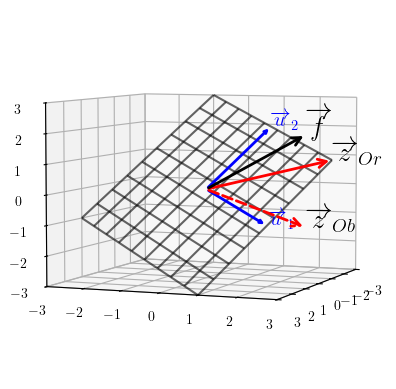

In [8]:
# Define the matrix U and vector f
U = np.array([[ 1, -2],
              [ 2,  1],
              [-1,  2]])

f = np.array([1., 3, 2.])

# Indices for submatrix
p = [0, 1]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot vector f
arw1 = Arrow3D([0, f[0]], [0, f[1]], [0, f[2]], arrowstyle="->", color="k", lw=2, mutation_scale=15)
ax.add_artist(arw1)
ax.text(f[0], f[1], f[2], '$\overrightarrow{f}$', fontsize=20)

# Plot the plane defined by U
a1, a2 = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
ax.plot_wireframe(-a1-2*a2, -2*a1+a2, a1+2*a2, linewidth=1.5, color='k', alpha=.6)

# Plot vectors u1 and u2
arw1 = Arrow3D([0, U[0, 0]], [0, U[1, 0]], [0, U[2, 0]], arrowstyle="->", color="b", lw=2, mutation_scale=5)
ax.add_artist(arw1)
ax.text(U[0, 0], U[1, 0], U[2, 0], '$\overrightarrow{u}_1$', fontsize=15, color="b")

arw2 = Arrow3D([0, U[0, 1]], [0, U[1, 1]], [0, U[2, 1]], arrowstyle="->", color="b", lw=2, mutation_scale=5)
ax.add_artist(arw2)
ax.text(U[0, 1], U[1, 1], U[2, 1], '$\overrightarrow{u}_2$', fontsize=15, color="b")

# Calculate and plot orthogonal projection z_or
z_or = 0.2 * U @ U.T @ f
arw3 = Arrow3D([0, z_or[0]], [0, z_or[1]], [0, z_or[2]], arrowstyle="->", color="r", lw=2, mutation_scale=15)
ax.add_artist(arw3)
ax.text(z_or[0], z_or[1], z_or[2], '$\overrightarrow{z}_{Or}$', fontsize=20)

# Calculate and plot oblique projection z_ob
z_ob = U @ np.linalg.inv(U[p]) @ f[p]
arw3 = Arrow3D([0, z_ob[0]], [0, z_ob[1]], [0, z_ob[2]], arrowstyle="->", linestyle='--', color="r", lw=2, mutation_scale=15)
ax.add_artist(arw3)
ax.text(z_ob[0], z_ob[1], z_ob[2], '$\overrightarrow{z}_{Ob}$', fontsize=20)

# Set plot limits
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# Set view angle
ax.view_init(5, 22)

plt.show()

# Systems of Linear Equations

A **system of linear equations** consists of multiple linear equations that can be represented in matrix form as $A \mathbf{x} = \mathbf{b}$, where:

- $A \in \mathbb{R}^{n \times n}$ is a square matrix,
- $\mathbf{x} \in \mathbb{R}^n$ is the vector of unknowns,
- $\mathbf{b} \in \mathbb{R}^n$ is the vector of constants.

A solution $\mathbf{x}$ exists if and only if $\mathbf{b}$ lies in the **column space** of $A$; that is, if $\mathbf{b}$ can be expressed as a linear combination of the columns of $A$. Specifically, the system seeks scalars $x_1, x_2, \dots, x_n$ such that:

$$
A \mathbf{x} = x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2 + \dots + x_n \mathbf{a}_n = \mathbf{b},
$$

where $\mathbf{a}_1, \dots, \mathbf{a}_n$ are the columns of $A$. When $A$ is invertible (nonsingular), its columns span the entire space $\mathbb{R}^n$, ensuring that a unique solution exists for every $\mathbf{b} \in \mathbb{R}^n$.

## Linear Independence

A set of vectors $\{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_k\}$ in a vector space $\mathcal{V}$ is said to be **linearly independent** if none of the vectors can be written as a linear combination of the others. Formally, the set is linearly independent if the equation:

$$
\alpha_1 \mathbf{x}_1 + \alpha_2 \mathbf{x}_2 + \dots + \alpha_k \mathbf{x}_k = \mathbf{0}
$$

implies that all the scalar coefficients are zero:

$$
\alpha_1 = \alpha_2 = \dots = \alpha_k = 0.
$$

## Nonsingular Matrices

A square matrix $A \in \mathbb{R}^{n \times n}$ is called **nonsingular** (or invertible) if it satisfies any of the following equivalent conditions:

- The inverse $A^{-1}$ exists such that $A A^{-1} = A^{-1} A = I$,
- The rank of $A$ is $n$, meaning its columns are linearly independent,
- The columns of $A$ span $\mathbb{R}^n$,
- The null space of $A$ contains only the zero vector, $\operatorname{null}(A) = \{ \mathbf{0} \}$,
- Zero is not an eigenvalue of $A$,
- All singular values of $A$ are non-zero,
- The determinant of $A$ is non-zero, $\det(A) \neq 0$.

### Efficient Solution Methods

Directly computing the inverse of $A$ to solve $A \mathbf{x} = \mathbf{b}$ is generally inefficient and numerically unstable. A better approach is to use **LU decomposition**, where $A$ is factored into a lower triangular matrix $L$ and an upper triangular matrix $U$. This method reduces computational complexity:

- **Gaussian Elimination** (LU decomposition) requires approximately $\dfrac{2n^3}{3}$ operations during elimination,
- **Back Substitution** requires approximately $\dfrac{n^2}{2}$ operations to solve for $\mathbf{x}$.

rank(A1) = 3 --- det(A1) = 20.000 --- cond(A1) = 2.60
rank(A2) = 2 --- det(A2) = 0.000 --- cond(A2) = 11921025051799962.00


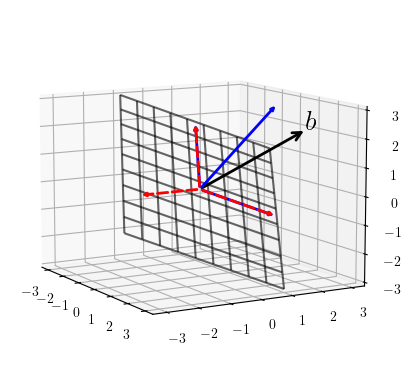

In [15]:
# Define matrices A1 and A2, and vector b
A1 = np.array([[ 1, -2, 1],
               [ 2,  1, 2],
               [-1,  2, 3]])

A2 = np.array([[ 1, -2, -0],
               [ 2,  1, -2],
               [-1,  2,  0]])

b = np.array([1., 3, 2.])

# Print rank, determinant, and condition number of A1 and A2
print(f"rank(A1) = {np.linalg.matrix_rank(A1, tol=1e-6):d} --- det(A1) = {np.linalg.det(A1):0.3f} --- cond(A1) = {np.linalg.cond(A1):0.2f}")
print(f"rank(A2) = {np.linalg.matrix_rank(A2, tol=1e-6):d} --- det(A2) = {np.linalg.det(A2):0.3f} --- cond(A2) = {np.linalg.cond(A2):0.2f}")

# Solve the linear system A1 * x = b
x = np.linalg.solve(A1, b)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the plane defined by A1
a1, a2 = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
ax.plot_wireframe(-a1-2*a2, -2*a1+a2, a1+2*a2, linewidth=1.5, color='k', alpha=.6)

# Plot vector b
arw1 = Arrow3D([0, b[0]], [0, b[1]], [0, b[2]], arrowstyle="->", color="k", lw=2, mutation_scale=15)
ax.add_artist(arw1)
ax.text(b[0], b[1], b[2], '$b$', fontsize=20)

# Plot columns of A1
arw1 = Arrow3D([0, A1[0, 0]], [0, A1[1, 0]], [0, A1[2, 0]], arrowstyle="->", color="b", lw=2, mutation_scale=5)
ax.add_artist(arw1)
arw2 = Arrow3D([0, A1[0, 1]], [0, A1[1, 1]], [0, A1[2, 1]], arrowstyle="->", color="b", lw=2, mutation_scale=5)
ax.add_artist(arw2)
arw3 = Arrow3D([0, A1[0, 2]], [0, A1[1, 2]], [0, A1[2, 2]], arrowstyle="->", color="b", lw=2, mutation_scale=5)
ax.add_artist(arw3)

# Plot columns of A2
arw1 = Arrow3D([0, A2[0, 0]], [0, A2[1, 0]], [0, A2[2, 0]], arrowstyle="->", linestyle='--', color="r", lw=2, mutation_scale=5)
ax.add_artist(arw1)
arw2 = Arrow3D([0, A2[0, 1]], [0, A2[1, 1]], [0, A2[2, 1]], arrowstyle="->", linestyle='--', color="r", lw=2, mutation_scale=5)
ax.add_artist(arw2)
arw3 = Arrow3D([0, A2[0, 2]], [0, A2[1, 2]], [0, A2[2, 2]], arrowstyle="->", linestyle='--', color="r", lw=2, mutation_scale=5)
ax.add_artist(arw3)

# Set view angle
ax.view_init(10, -30)

Multiplying a vector $\mathbf{b}$ by $A^{-1}$ transforms its representation from the standard basis $\{ \mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_m \}$ to its coordinates in the basis formed by the columns of $A$, namely $\{ \mathbf{a}_1, \mathbf{a}_2, \dots, \mathbf{a}_m \}$. In this context, $A^{-1} \mathbf{b}$ provides the coefficients of $\mathbf{b}$ expressed in terms of the new basis. This operation is essentially a **change of basis**.

Conversely, multiplying these coefficients by $A$ converts them back into the standard basis representation. Thus, multiplication by $A$ or $A^{-1}$ switches between these two coordinate systems.

$$
\mathbf{b} = \text{coordinates in } \{ \mathbf{e}_1, \dots, \mathbf{e}_m \} \xleftrightarrow[\text{Multiply by } A^{-1}]{\text{Multiply by } A} A^{-1} \mathbf{b} = \text{coordinates in } \{ \mathbf{a}_1, \dots, \mathbf{a}_m \}
$$

# Least Squares Problem

In observational and experimental sciences, measurement errors and random variations are inevitable. To smooth out this variability, one common approach is to collect more measurements than the minimum required to determine the system's parameters. This results in an **overdetermined system**, where there are more equations than unknowns, and typically, no exact solution exists. Essentially, we project higher-dimensional data onto a lower-dimensional subspace to suppress noise and irrelevant details. The method of **least squares** is a standard technique for performing this projection.

In the least squares problem, we aim to find a vector $\mathbf{x}$ that minimizes the sum of the squared differences between $A \mathbf{x}$ and $\mathbf{b}$. Formally, we minimize the squared Euclidean norm of the residual vector $\mathbf{r} = \mathbf{b} - A \mathbf{x}$:

$$
\min_{\mathbf{x}} \| \mathbf{r} \|_2^2 = \min_{\mathbf{x}} \| \mathbf{b} - A \mathbf{x} \|_2^2
$$

This minimization leads to the **normal equations**, an $n \times n$ linear system:

$$
A^T A \, \mathbf{x} = A^T \mathbf{b}
$$

The least squares problem $A \mathbf{x} \approx \mathbf{b}$ always has a solution. The solution is unique if and only if the columns of $A$ are linearly independent, which means $\operatorname{rank}(A) = n$ for $A \in \mathbb{R}^{m \times n}$. If $\operatorname{rank}(A) < n$, then $A$ is rank-deficient, and the least squares solution is not unique.

When $\operatorname{rank}(A) = n$, the pseudoinverse of $A$ is given by:

$$
A^{+} = \left( A^T A \right)^{-1} A^T
$$

Additionally, the condition number of $A^T A$ relates to that of $A$ by:

$$
\operatorname{cond}(A^T A) = \left( \operatorname{cond}(A) \right)^2
$$

This squaring of the condition number indicates that forming the normal equations can amplify numerical instability, especially when $A$ is ill-conditioned.

**Important Note:** It is advisable **not** to form the normal equations explicitly due to potential numerical instability. Instead, one should use the **QR decomposition** of $A$ to solve the least squares problem more reliably.

Alternatively, consider the **singular value decomposition (SVD)** of $A$, given by $A = U \Sigma V^T$, where $\Sigma$ is a diagonal matrix with singular values $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$. Define $\Sigma^{+}$ as:

$$
\Sigma^{+} = \begin{pmatrix}
\frac{1}{\sigma_1} & & & & & \\
& \ddots & & & & \\
& & \frac{1}{\sigma_r} & & & \\
& & & 0 & & \\
& & & & \ddots & \\
& & & & & 0
\end{pmatrix}
$$

Then, the pseudoinverse of $A$ can also be expressed as:

$$
A^{+} = V \Sigma^{+} U^T
$$

While the **QR decomposition** is suitable for most everyday applications due to its efficiency, it may not be the best choice when $A$ is close to rank-deficient. In such cases, algorithms based on the **SVD** offer greater numerical stability and are preferable.

rank(A) = 2 --- cond(A) = 1.41


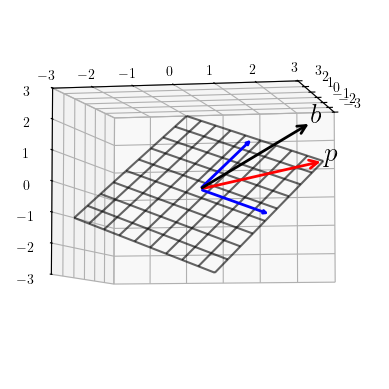

In [16]:
# Define matrix A and vector b
A = np.array([[ 1, -2],
              [ 2,  1],
              [-1,  2]])

b = np.array([1., 3, 2.])

# Print rank and condition number of A
print(f"rank(A) = {np.linalg.matrix_rank(A, tol=1e-6):d} --- cond(A) = {np.linalg.cond(A):0.2f}")

# Solve the least squares problem A * x = b
x = np.linalg.lstsq(A, b, rcond=None)[0]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot vector b
arw1 = Arrow3D([0, b[0]], [0, b[1]], [0, b[2]], arrowstyle="->", color="k", lw=2, mutation_scale=15)
ax.add_artist(arw1)
ax.text(b[0], b[1], b[2], '$b$', fontsize=20)

# Plot the plane defined by A
a1, a2 = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
ax.plot_wireframe(-a1-2*a2, -2*a1+a2, a1+2*a2, linewidth=1.5, color='k', alpha=.6)

# Plot columns of A
arw1 = Arrow3D([0, A[0, 0]], [0, A[1, 0]], [0, A[2, 0]], arrowstyle="->", color="b", lw=2, mutation_scale=5)
ax.add_artist(arw1)
arw2 = Arrow3D([0, A[0, 1]], [0, A[1, 1]], [0, A[2, 1]], arrowstyle="->", color="b", lw=2, mutation_scale=5)
ax.add_artist(arw2)

# Calculate and plot orthogonal projection pb
pb = 0.2 * A @ A.T @ b
arw3 = Arrow3D([0, pb[0]], [0, pb[1]], [0, pb[2]], arrowstyle="->", color="r", lw=2, mutation_scale=15)
ax.add_artist(arw3)
ax.text(pb[0], pb[1], pb[2], '$p$', fontsize=20)

# Set plot limits
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# Set view angle
ax.view_init(-5, 12)

plt.show()